In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
upload = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
features = df.drop(labels='Revenue', axis=1)
sample = df['Revenue']
COLUMNS = features.columns.values
print(np.unique(sample))

[False  True]


In [ ]:
sample = LabelEncoder().fit_transform(sample)
np.unique(sample)

array([0, 1])

In [ ]:
stand_ord = ColumnTransformer(transformers=[
    ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool'])),
    ('numéricas',StandardScaler(), make_column_selector(dtype_include=['float64','int64']))],
    remainder='passthrough',
    verbose_feature_names_out= False,)

stand_dum = ColumnTransformer(transformers=[
    ('categoricas', OneHotEncoder(), make_column_selector(dtype_include=['object','bool'])),
    ('numéricas',StandardScaler(), make_column_selector(dtype_include=['float64','int64']))],
    remainder='passthrough',
    verbose_feature_names_out= False,)

norm_ord = ColumnTransformer(transformers=[
    ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool'])),
    ('numéricas',MinMaxScaler(), make_column_selector(dtype_include=['float64','int64']))],
    remainder='passthrough',
    verbose_feature_names_out= False,)

norm_dum = ColumnTransformer(transformers=[
    ('categoricas', OneHotEncoder(), make_column_selector(dtype_include=['object','bool'])),
    ('numéricas',MinMaxScaler(), make_column_selector(dtype_include=['float64','int64']))],
    remainder='passthrough',
    verbose_feature_names_out= False,)

In [ ]:
features_stand_ord = pd.DataFrame(stand_ord.fit_transform(features), columns=stand_ord.get_feature_names_out())

features_stand_dum = pd.DataFrame(stand_dum.fit_transform(features), columns=stand_dum.get_feature_names_out())

features_norm_ord = pd.DataFrame(norm_ord.fit_transform(features), columns=norm_ord.get_feature_names_out())

features_norm_dum = pd.DataFrame(norm_dum.fit_transform(features), columns=norm_dum.get_feature_names_out())

In [ ]:
features_stand_ord = features_stand_ord[COLUMNS]

features_norm_ord = features_norm_ord[COLUMNS]

In [ ]:
F_so_train, F_so_test, S_so_train, S_so_test = train_test_split(features_stand_ord, sample, random_state=42,test_size=0.30)

F_sd_train, F_sd_test, S_sd_train, S_sd_test = train_test_split(features_stand_dum, sample, random_state=42,test_size=0.30)

F_no_train, F_no_test, S_no_train, S_no_test = train_test_split(features_norm_ord, sample, random_state=42,test_size=0.30)

F_nd_train, F_nd_test, S_nd_train, S_nd_test = train_test_split(features_norm_dum, sample, random_state=42,test_size=0.30)

In [ ]:
k = 10
classifier_knn_1 = KNeighborsClassifier(n_neighbors=k)
classifier_knn_2 = KNeighborsClassifier(n_neighbors=k)
classifier_knn_3 = KNeighborsClassifier(n_neighbors=k)
classifier_knn_4 = KNeighborsClassifier(n_neighbors=k)

In [ ]:
classifier_knn_1.fit(F_so_train,S_so_train)

classifier_knn_2.fit(F_sd_train,S_sd_train)

classifier_knn_3.fit(F_no_train,S_no_train)

classifier_knn_4.fit(F_nd_train,S_nd_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predict_SO = classifier_knn_1.predict(F_so_test)
predict_SD = classifier_knn_2.predict(F_sd_test)
predict_NO = classifier_knn_3.predict(F_no_test)
predict_ND = classifier_knn_4.predict(F_nd_test)

# <center>Métricas</center>

In [ ]:
accuracy_SO = accuracy_score(S_so_test, predict_SO)
accuracy_SD = accuracy_score(S_sd_test, predict_SD)
accuracy_NO = accuracy_score(S_no_test, predict_NO)
accuracy_ND = accuracy_score(S_nd_test, predict_ND)
print(f'Standardization and OrdinalEncoder: {round(accuracy_SO*100,4)}%')
print(f'Standardization and Dummy: {round(accuracy_SD*100,4)}%')
print(f'Normalization and OrdinalEncoder: {round(accuracy_NO*100,4)}%')
print(f'Normalization and Dummy: {round(accuracy_ND*100,4)}%')

Standardization and OrdinalEncoder: 87.5642%
Standardization and Dummy: 87.7805%
Normalization and OrdinalEncoder: 85.3744%
Normalization and Dummy: 85.3744%


<Axes: >

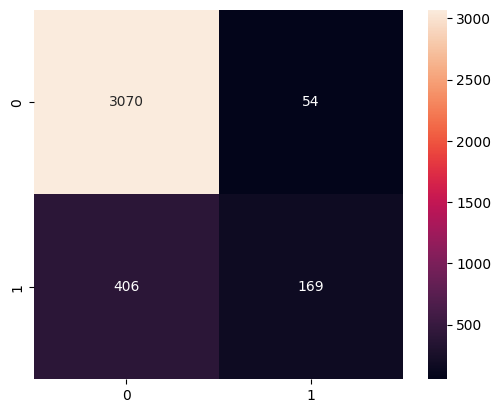

In [ ]:
confusionMatrix_SO = confusion_matrix(S_so_test,predict_SO)
sns.heatmap(confusionMatrix_SO, square=True, annot=True, cbar=True, fmt='d')

In [ ]:
report = classification_report(S_so_test,predict_SO)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3124
           1       0.76      0.29      0.42       575

    accuracy                           0.88      3699
   macro avg       0.82      0.64      0.68      3699
weighted avg       0.86      0.88      0.85      3699



# which is the better K?

In [ ]:
train = []
test = []

ks = range(1,30)

for k in ks:
  classifier_knn = KNeighborsClassifier(n_neighbors = k)
  classifier_knn.fit(F_so_train, S_so_train)
  train.append(accuracy_score(S_so_train, classifier_knn.predict(F_so_train)))
  test.append(accuracy_score(S_so_test, classifier_knn.predict(F_so_test)))

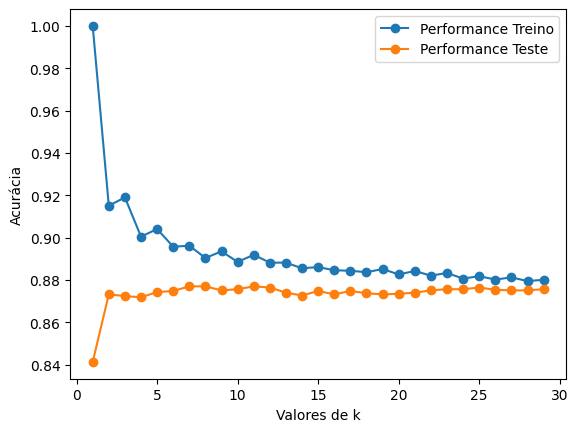

In [ ]:
plt.plot(ks, train, label = "Performance Treino", marker = 'o')
plt.plot(ks, test, label = "Performance Teste", marker = 'o')
plt.xlabel('Valores de k')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [ ]:
print(f'Melhor K no Teste: {test.index(max(test))}')
print(f'Melhor Acurrácia: {round(max(test)*100,4)}%')
#print(test)

Melhor K no Teste: 6
Melhor Acurrácia: 87.6994%


# cross validation

In [ ]:
knn = KNeighborsClassifier()

params = {'n_neighbors': ks}

grid = GridSearchCV(knn, params, cv=5)
grid.fit(F_so_train, S_so_train)

print(f'Melhor valor de K: {grid.best_params_}')
print(f'Melhor classificador: {grid.best_estimator_}')
print(f'Melhor score (médio): {round(grid.best_score_*100,4)}%')

Melhor valor de K: {'n_neighbors': 10}
Melhor classificador: KNeighborsClassifier(n_neighbors=10)
Melhor score (médio): 87.8462%


In [ ]:
print(f'Primeira Acurácia: {round(accuracy_SO*100,4)}%')
print(f'Segunda Acurácia: {round(max(test)*100,4)}%')
print(f'Terceira Acurácia: {round(grid.best_score_*100,4)}%')

Primeira Acurácia: 87.5642%
Segunda Acurácia: 87.6994%
Terceira Acurácia: 87.8462%
